In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5990,1472-TNCWL,Male,0,No,Yes,36,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.7,3512.5,No
5475,1114-CENIM,Male,0,No,Yes,54,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.0,3092.65,Yes
6333,8651-ENBZX,Female,1,No,No,60,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,106.0,6441.4,Yes
6044,1689-YQBYY,Female,0,No,Yes,12,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.6,893,No
6088,3063-QFSZL,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.4,55.4,Yes


In [3]:
df.drop('customerID', axis = 'columns', inplace = True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [13]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1[df1.Churn == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

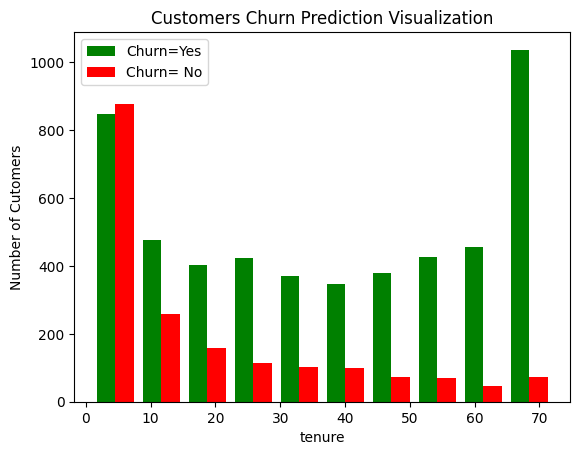

In [15]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'], label =['Churn=Yes', 'Churn= No'])
plt.xlabel("tenure")
plt.ylabel("Number of Cutomers")

plt.title("Customers Churn Prediction Visualization")
plt.legend()


In [16]:
def print_unique_col_values(df):
    
    for col in df:
        if df[col].dtypes == 'object':
            
            print(f'{col}: {df[col].unique()}')

In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No internet service', 'No', inplace = True)

C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\1535027129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\1535027129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)


In [19]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace =True)

C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\2543674149.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0}, inplace =True)
C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\2543674149.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [20]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: ['No phone service' 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [21]:
df1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)

C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\4252887180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)
C:\Users\Archita Shrivastava\AppData\Local\Temp\ipykernel_10264\4252887180.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [22]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [23]:
df2 = pd.get_dummies(data=df1, columns =['InternetService'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [24]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
6046,1,0,0,0,9,1,0,0,0,1,...,1,Month-to-month,1,Credit card (automatic),85.30,781.4,0,False,True,False
4069,0,0,1,1,68,1,0,1,0,0,...,1,Two year,1,Electronic check,99.55,6668.0,0,False,True,False
933,1,1,0,0,4,1,1,0,0,0,...,1,Month-to-month,1,Electronic check,84.60,360.1,1,False,True,False
2055,0,0,0,0,45,1,1,1,0,1,...,1,Month-to-month,1,Credit card (automatic),108.45,4964.7,0,False,True,False


In [25]:
df2.dtypes

gender                           int64
SeniorCitizen                    int64
Partner                          int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                   object
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
Contract                        object
PaperlessBilling                 int64
PaymentMethod                   object
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
InternetService_DSL               bool
InternetService_Fiber optic       bool
InternetService_No                bool
dtype: object

In [26]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1288,0,0,0,0,0.887324,1,0,0,0,0,...,0,Two year,0,Mailed check,0.012935,0.140936,0,False,False,True
3767,0,0,1,0,1.000000,1,1,1,0,1,...,1,Two year,1,Credit card (automatic),0.921891,0.948771,0,False,True,False
22,0,0,0,0,0.000000,1,0,0,0,0,...,0,Month-to-month,0,Mailed check,0.018905,0.000156,1,False,False,True


In [28]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: ['No phone service' 0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [

In [29]:
X = df2.drop('Churn', axis = 'columns')
y = df['Churn']

In [30]:
# Method 1: If they're pandas objects with same index but different lengths
# Keep only the common indices
common_indices = X.index.intersection(y.index)
X_aligned = X.loc[common_indices]
y_aligned = y.loc[common_indices]

print(f"After alignment - X: {len(X_aligned)}, y: {len(y_aligned)}")

# Now split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_aligned, y_aligned, test_size=0.2, random_state=5
)

After alignment - X: 7032, y: 7032


In [31]:
from sklearn.model_selection import train_test_split

# Now split the aligned data
X_train, X_test, y_train, y_test = train_test_split(
    X_aligned, y_aligned, test_size=0.2, random_state=5
)

print(f"Training set: X_train: {len(X_train)}, y_train: {len(y_train)}")
print(f"Test set: X_test: {len(X_test)}, y_test: {len(y_test)}")
print(f"Train/Test split: {len(X_train)/len(X_aligned)*100:.1f}% / {len(X_test)/len(X_aligned)*100:.1f}%")

Training set: X_train: 5625, y_train: 5625
Test set: X_test: 1407, y_test: 1407
Train/Test split: 80.0% / 20.0%


In [32]:
X_train.shape

(5625, 21)

In [33]:
len(X_train.columns)

21

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

# First, let's check what we're working with
print("Type of X_train:", type(X_train))
print("Type of y_train:", type(y_train))

# If X_train is a NumPy array, we need to go back to the original DataFrame
# Let's assume you need to reload or reconstruct your data
# For now, let's create a proper preprocessing approach

# If you need to reconstruct your data, you might need to:
# 1. Go back to your original data loading step
# 2. Or recreate the DataFrame structure

Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'pandas.core.series.Series'>


In [45]:
import numpy as np
from tensorflow import keras

# Example: If y_train is a pandas Series containing categorical labels like 'Yes' and 'No'
if y_train.dtype == 'object' or y_train.dtype.name == 'string':
    # Map string labels to numeric values
    y_train = y_train.map({'No': 0, 'Yes': 1}).astype(np.float32)

# Print data shapes and types for confirmation
print("X_train shape:", X_train.shape)  # e.g. (num_samples, 21)
print("y_train shape:", y_train.shape)  # e.g. (num_samples,)
print("y_train dtype:", y_train.dtype)  # should be float32

# Define model with input shape matching the features count
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(21,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

# Compile model with binary cross-entropy for binary labels
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100)


X_train shape: (5625, 21)
y_train shape: (5625,)
y_train dtype: float32
Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.5874 - accuracy: 0.6697
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4546 - accuracy: 0.7819
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4334 - accuracy: 0.7968
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4267 - accuracy: 0.7980
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4237 - accuracy: 0.8016
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4234 - accuracy: 0.7993
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4215 - accuracy: 0.8021
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4211 - accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4199 - accuracy: 0.8020
Epoch 10/100
176/17

In [51]:
import pandas as pd
import numpy as np

# Convert NumPy arrays to DataFrames first, 
# assuming you have column names in 'column_names' list matching feature count (21 features)
column_names = [f'feature_{i}' for i in range(21)]
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Now apply get_dummies on DataFrames (one-hot encode categorical features)
X_train_encoded = pd.get_dummies(X_train_df)
X_test_encoded = pd.get_dummies(X_test_df)

# Align columns in test data to training data (fill missing columns with 0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Convert DataFrames to float32 NumPy arrays
X_train_np = X_train_encoded.astype(np.float32).to_numpy()
X_test_np = X_test_encoded.astype(np.float32).to_numpy()


In [53]:
import numpy as np

# If y_test contains categorical string labels:
y_test = y_test.map({'No': 0, 'Yes': 1}).astype(np.float32)  # if pandas Series

# Or if y_test is numpy array of strings:
# y_test = np.array([0 if label == 'No' else 1 for label in y_test]).astype(np.float32)


In [54]:
print(y_test.dtype)  # Should be float32 or int32


float32


In [55]:
loss, accuracy = model.evaluate(X_test_np, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


44/44 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7100
Test Loss: nan
Test Accuracy: 0.7100213170051575


In [58]:
import pandas as pd
import numpy as np

# Convert the NumPy array or raw data to a pandas DataFrame (if not already)
# Suppose you have feature names or use default ones
column_names = [f'feature_{i}' for i in range(X_test.shape[1])]
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Convert categorical string data to one-hot encoded numeric columns
X_test_encoded = pd.get_dummies(X_test_df)

# If you have already done this for training, ensure columns are aligned:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Convert the encoded DataFrame to a numeric NumPy array of type float32
X_test_np = X_test_encoded.astype(np.float32).to_numpy()


In [62]:
yp = model.predict(X_test_np)



44/44 [==============================] - 0s 2ms/step


In [63]:
y_test[:5]

2660    0.0
744     0.0
5579    1.0
64      1.0
3287    1.0
Name: Churn, dtype: float32

In [64]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [65]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       999
         1.0       0.00      0.00      0.00       408

    accuracy                           0.71      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.50      0.71      0.59      1407



C:\Users\Archita Shrivastava\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Archita Shrivastava\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Archita Shrivastava\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

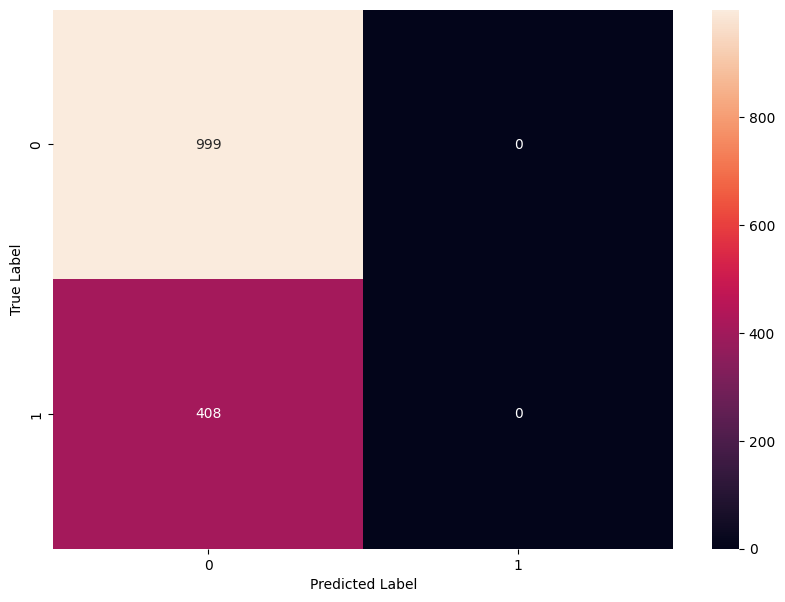

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are 1D arrays or lists of true labels and predicted labels, respectively

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
